# Assignment 1: Comparison of Regression Models on Predicting Medical Costs

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
![Medical Cost](https://creditkarma-cms.imgix.net/wp-content/uploads/2018/04/boomers-gen-x-high-cost-medical-care.jpg)
In this assignment, you will implement some learning models in the context of a **regression** problem in the [Medical Cost Personal Dataset on Kaggle](https://www.kaggle.com/mirichoi0218/insurance). Specifically, you will attempt to predict the medical cost billed by health insurance using other provided patient's data. For references, you may refer to [my slides](https://docs.google.com/presentation/d/10D1he89peAWaFgjtZlHpUzvOOAie_vIFT95htKCKgc0/edit#slide=id.p) or the Google Colab if you need additional sample codes to help with your assignment. To get started, you will need to upload/copy the dataset (.csv) into the same folder as this file.

For deliverables, you must write code in Colab and submit the downloaded Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.


***
##  Task 1: SEE THE BIG PICTURE
Write a paragraph explaining the context of the problem in which you are trying to investigate. We will assume that the data file is put into the same workspace on Colab. Then, you can write some code to load the CSV file and take a quick look at the dataset, and output the following:

 * How big is your dataset? (in terms of MB)
 * How many entries does it have?
 * How many features does it have?
 * Does it contain any categorical data?
 * Is there any missing value?
 * What are some basic statistics you can learn right away about this dataset?

In [2]:
# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

path_insurance = "./insurance.csv"
train = pd.read_csv(path_insurance)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


It seems that there are 7 columns of data and 1338 entries. This means that there are 6 features. Ther doesn't seem to be any mssing values either.

In [4]:
train.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


It looks like age, sex, smoker, and reigon are all categorical. Children could also be classified as a categorical variable if we so choose.

In [255]:
train.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Here are some basic statistics about the data.

---
##  Task 2: DATA DISCOVERY, CLEANING, AND SCALING

**Data Discover:** Plot out all correlations among the features. You should notice some features are more correlated with your predicted value than other. This information will help you confirm that weights of your regression model later on.

**Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the Imputer class. If your dataset has categorical features, make sure you conver those features into numerical using OneHotEncoder class.

**Feature Scaling** More importantly, your task is to write some codes to normalize the value of each features as follow:

* Subtract the mean value of each feature from the dataset
* Scale (divide) the feature values by their respective standard deviation

**Implementation Note:** You will need to integrate the above operations into a Pipeline to process and transform the training data, then use the same pipeline to transform any validation and testing data.

In [256]:
# You might want to use the following package
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import seaborn as sns

<ipython-input-257-116d4ea7c41d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat = train.corr()


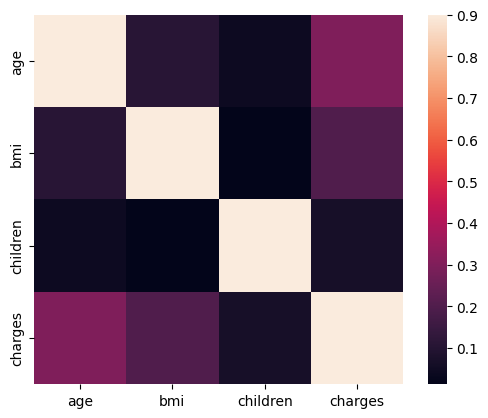

In [257]:
cormat = train.corr()
sns.heatmap(cormat, vmax=.9, square=True);

We don't see much correlation between the variables, which is good for interpretations as this means only a small amount of colinearity

In [258]:
X_train,  X_test, y_train, y_test = train_test_split(train.drop('charges', axis = 1), train['charges'], test_size = 0.5, random_state=42)

In [259]:
encodeCat = Pipeline([('impute', SimpleImputer(strategy='most_frequent')),('cat_label',OneHotEncoder())])

In [260]:
#Imputer not needed but included for future proofing of data
transformQuant = Pipeline([('impute', SimpleImputer(strategy='mean')), ('standard_scale', StandardScaler())])

In [261]:
feature_preprocess = ColumnTransformer(transformers = [
    ('categorical', encodeCat, ['smoker', 'sex', 'region']), #train.select_dtypes(include=['object']).columns.tolist()
    ('quantitative', transformQuant, ['age', 'bmi', 'children'])]
)

In [262]:
feature_preprocess.fit(X_train, y_train)

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat_label',
                                                  OneHotEncoder())]),
                                 ['smoker', 'sex', 'region']),
                                ('quantitative',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('standard_scale',
                                                  StandardScaler())]),
                                 ['age', 'bmi', 'children'])])

In [263]:
X_train = feature_preprocess.transform(X_train)

In [264]:
X_test = feature_preprocess.transform(X_test)

- - -
## Task 3. IMPLEMENT GRADIENT DESCENT
The gradient descent formulation remain the same as one in the lecture. Keep in mind that you will need to add a column $\textbf{x}_0$ with all 1s as part of the training data. You should write code to implement the **MyLinearRegression** class and its predefined methods.

**Gradient Descent:** Notes that you may NOT call the library linear regression which defeats the purpose of this assignment. Make sure your code is well-vectorized.

In [265]:
from numpy.lib.function_base import gradient
import math
# NOTE: You may not use the library Linear Regression, but implement your own!
# REMEMBER to place self.attribute = [] with value from your implementation

class MyLinearRegression:
  """
  Define what a linear regressor can do
  """

  def __init__ (self):
    """
    Initialize the regressor
    """
    self.theta = []; # parameter vector;
    self.alpha = [0.001, 0.01, 0.05, 0.1, 0.2, 0.3]; # learning rate
    self.cost  = []; # cost function
    self.lowestAlpha = 1

  def fitUsingGradientDescent(self, X_train, y_train):
    new_train = np.insert(X_train, 0, 1, axis = 1)
    lowestRMSE = math.inf
    self.cost = []
    for alpha in self.alpha:
      theta = np.random.randn(new_train.shape[1],1)
      theta, cost = self.gradientDescent(new_train, y_train, theta, alpha, 100)
      rmse = self.get_rmse(cost)
      if rmse < lowestRMSE:
        lowestRMSE = rmse
        self.theta = theta
        self.lowestAlpha = alpha
      self.cost.append(cost)

  def fitUsingNormalEquation(self, X_train, y_train):
    new_train = np.insert(X_train, 0, 1, axis = 1)
    self.theta = np.linalg.pinv(new_train).dot(y_train)
    self.cost = np.sqrt(np.mean((new_train.dot(self.theta)-y_train)**2))


  def gradientDescent(self, X_train, y_train, theta, alpha, iters):
    m = X_train.shape[0]
    cost = []
    for i in range(iters):
      gradient = 2/m * X_train.T.dot(X_train.dot(theta) - y_train)
      theta = theta - gradient*alpha
      cost.append(np.sqrt(np.mean((X_train.dot(theta)-y_train)**2)))
    return theta, cost
    """
    Implementatation of the gradient descent
    INPUT:
    alpha: the learning rate
    iters: number of iterations

    OUTPUT:
    theta: updated value for theta
    cost: value of the cost function
    """
    # implementation code here
  def get_rmse(self,cost):
    return np.sqrt(np.mean(cost))

  def predict(self, X_test):
    y_predict = X_test.dot(self.theta)
    """
    Predicting the label
    """
    # implementation code here
    return y_predict

  def __str__(self):
    """
    Print out the parameter out when call print()
    """
    # implement here to return("Parameter vector is %f" % self.theta)   }
    print("Parameter vector is %f" % self.theta)

In [266]:
# Your code goes here to call the instance of class MyLinearRegression
y_train_len, y_test_len = y_train.shape[0], y_test.shape[0]
y_train = np.reshape(y_train.to_numpy(),(y_train_len,1))

In [267]:
y_test = np.reshape(y_test.to_numpy(),(y_test_len,1))

In [268]:
myGradientDescentModel = MyLinearRegression()

myGradientDescentModel.fitUsingGradientDescent(X_train, y_train)

* **Learning Rate:** You will try out different learning rates for the dataset and find a learning rate that converges quickly. If you pick a learning rate, your plot of Cost Function $J(\theta)$ against number of iteration will quickly decay to a small value. This also indicates that your implementation is correct. If your learning rate is too large, the cost function $J(\theta)$ can diverge and blow up. From the below plot, you must be able to report the best learning rate the you found to earn credit for this section.

Text(0.5, 1.0, 'Error vs. Training Iterations')

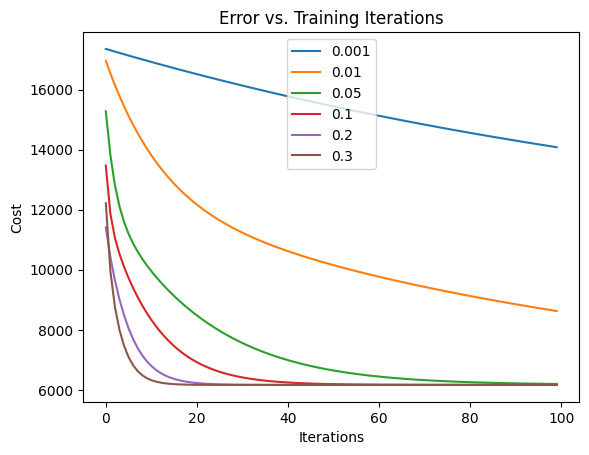

In [269]:
# Use the following code to plot out your learning rate
# iters and cost must be supplied to plot out the cost function
# You must plot multiple curves corresponding to different learning rates to justify the best one.
#
for i in range(len(myGradientDescentModel.cost)):
  plt.plot(myGradientDescentModel.cost[i], label = str(myGradientDescentModel.alpha[i]))
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend(loc='upper center')
plt.title('Error vs. Training Iterations')

The best learning rate is 0.3. This makes sense as we are wrking with a linear regression model, which only has one global minimum. This means that we expect each of the learning rates to converse to the same minimum.

- - -
## Task 4. IMPLEMENT THE NORMAL EQUATION

In my lecture, you learn that the closed form solution of linear regression using the normal equation formulation. Using the formula does not require any feature scaling, and should be straight forward to implement:

$
    \mathbf{\theta} = ({\mathbf{X}^{T}\mathbf{X}})^{-1}\mathbf{X}^{T}\mathbf{y}.
$

Note that you still need to add a column of 1's to the $\mathbf{
X}$ matrix to have an intercept term.

In [270]:
# Implement the normalEquation method of the MyLinearRegression Class before execute the code below:
myNormalEquationModel = MyLinearRegression()
myNormalEquationModel.fitUsingNormalEquation(X_train, y_train)

This is the same value that we converged to with Gradient descent

- - -
## Task 5. COMPARE DIFFERENT IMPLEMENTATIONS

You should be able to evaluate and compare your gradient descent as well as normal equation implementation of linear regression. In theory, they should be the same, or at least similar. For good measures, you must use the built-in library **Scholastic Gradient Descent (SGD)** as a third model for comparison. For each model, you must compute the RMSE on the **test set** as performance measure. The good news is that you can call library functions to compute these as shown below instead of writing your own code:

* Which one yields the best performance measure for your dataset?
* What is your assessment of the error? Good? Okay? Terrible?

In [272]:

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
# Use the built-in SGD Regressor model
from sklearn.linear_model import SGDRegressor
mySGDModel = SGDRegressor()
mySGDModel.fit(X_train,y_train)
y_predict = mySGDModel.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
mySGDModel_rmse = np.sqrt(mse)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [273]:
X_test_one = np.insert(X_test, 0, 1, axis = 1)
myGradientDescentModel_rmse = np.sqrt(np.mean((myGradientDescentModel.predict(X_test_one)-y_test)**2))
myNormalEquationModel_rmse = np.sqrt(np.mean((myNormalEquationModel.predict(X_test_one)-y_test)**2))

print(mySGDModel_rmse, myGradientDescentModel_rmse, myNormalEquationModel_rmse)

5939.6461018780055 5939.393609923967 5939.3935389276285


Each of the RMSE are basically the same, which is good to see.

- - -
## Task 6. PRESENT YOUR SOLUTION

Now that you need to write a short memo of one paragraph to be read by a non-technical audience (ie. your manager/boss). Focus on answering the following:

* How can you pitch your solution to this project?
* What did you learn so far about the problem?
* Is there any insight moving forward to improve the solution.

Here, we can see start to see the upsides and downsides of each algorithm. For linear regression, we can see that using the normal equation requires O(n^3) for computing the pseudoinverse. For batch gradient descent, we can see that each iteration is O(n^2). This means that as long as we find the correct learning rate, we can converge much faster than just calculating the closed normal form. In problems other than linear regression, we can see how we can incorporate gradient descent to fit the problem.
Furthermore, we can analyze the benefits and costs of different types of gradient descents such at Batch, Stochastic, and mini-Batch gradient descent.
As n grows very large, we can see that the O(n^2) of batch gradient descent still might be too slow, and we can choose mini-Batch or Stochastic gradient descent as a subsitute.

For this specific problem, we see that the specific algorithm doesn't matter, and each of the predictions end up being the same.
In terms of medical costs - our error is arount half of the average. This means that for the average record, our prediction could be more than 50% off. This is not very impressive, and a deeper dive of the data as well as different models are required for more accurate prediction.

- - -
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my [slides](https://docs.google.com/presentation/d/10D1he89peAWaFgjtZlHpUzvOOAie_vIFT95htKCKgc0/edit?usp=sharing) and/or the textbook
 * Talk to the TA, they are available and there to help you during [office hour](http://bit.ly/cs4774oh)
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Assignment 1:...".

Best of luck and have fun!